# Test MIO 
Read MIO, and perform all sorts of actions. 

In [2]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL

In [3]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from ontodot.ontodot import vis 
from ontodot.ontodot import OntoVis


<br>
Test import of a sane ontology like MIO. <br>


In [5]:
mio=Namespace("http://www.ddmd.io/mio/")

In [6]:
base_path = '../MIO/'
catalog_file = 'catalog-v001.xml'

In [7]:
mio_manager = OntologyManager(base_path, catalog_file)
mio_manager.parse_catalog()
mio_manager.load_ontology()

name= http://ddmd.io/mio/ uri= ./mio/mio.ttl
Loaded ontology: http://ddmd.io/mio/


In [8]:
for k, g in mio_manager.ontology_graphs.items():
    print(g.serialize())

    #G = rdflib_to_networkx_multidigraph(v)
    #nt = Network('500px', '1000px', notebook=True)
    ## populates the nodes and edges data structures
    #nt.from_nx(G)
    #nt.show('nx.html')

@prefix : <http://www.ddmd.io/mio/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

: a owl:Ontology .

:Cognition a owl:Class ;
    rdfs:label "Cognition" ;
    rdfs:comment "Represents the mental processes involved in acquiring, processing, and understanding information, often crucial in interpreting and analyzing test results." ;
    rdfs:subClassOf :Process .

:Composite_Material a owl:Class ;
    rdfs:label "Composite Material" ;
    rdfs:comment "Represents a material composed of two or more distinct constituents with different properties." ;
    rdfs:subClassOf :Material .

:Condition a owl:Class ;
    rdfs:label "Condition" ;
    rdfs:subClassOf :Overlapping .

:DataSet a owl:Class ;
    rdfs:label "Data Set" ;
    rdfs:comment "Represents a collection of related data or information, often organized for analysis, presentation, or sharing." ;
    rdfs:subClassOf :Encoded

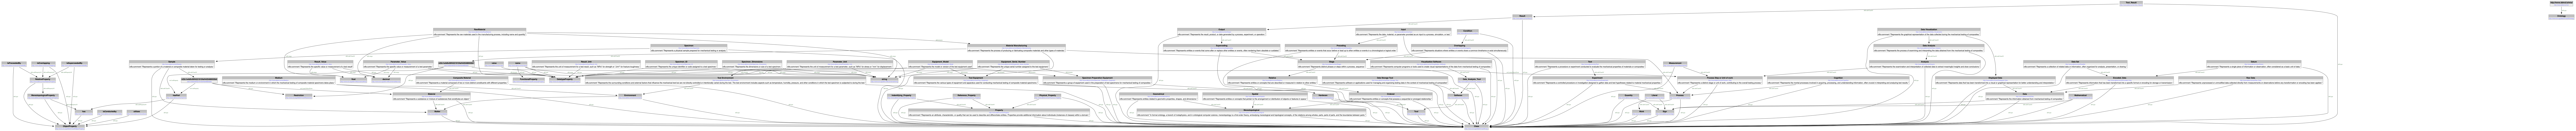

In [9]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))
visualize(g)



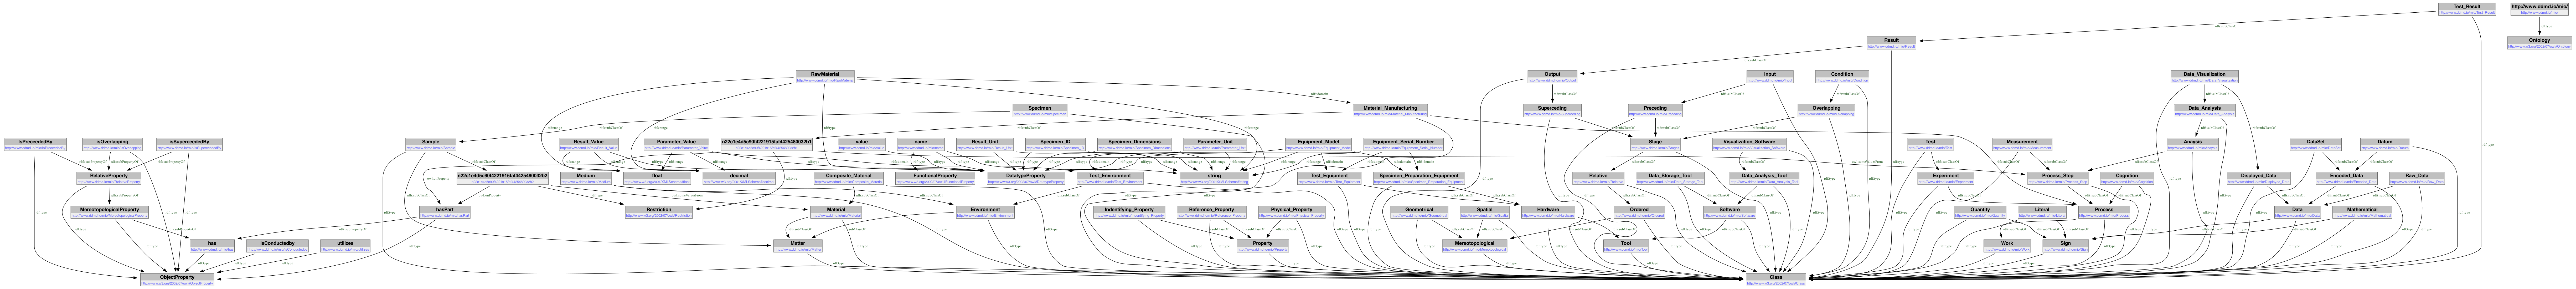

@prefix : <http://www.ddmd.io/mio/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

: a owl:Ontology .

:Cognition a owl:Class ;
    rdfs:label "Cognition" ;
    rdfs:comment "Represents the mental processes involved in acquiring, processing, and understanding information, often crucial in interpreting and analyzing test results." ;
    rdfs:subClassOf :Process .

:Composite_Material a owl:Class ;
    rdfs:label "Composite Material" ;
    rdfs:comment "Represents a material composed of two or more distinct constituents with different properties." ;
    rdfs:subClassOf :Material .

:Condition a owl:Class ;
    rdfs:label "Condition" ;
    rdfs:subClassOf :Overlapping .

:DataSet a owl:Class ;
    rdfs:label "Data Set" ;
    rdfs:comment "Represents a collection of related data or information, often organized for analysis, presentation, or sharing." ;
    rdfs:subClassOf :Encoded

In [10]:

vis(g, max_string_length=5)

print(g.serialize())

In [11]:

# Query for all classes ! 
query = """
    SELECT ?class
    WHERE {
        ?class rdfs:subClassOf owl:Thing .
    }
"""
results = g.query(query)

In [12]:
# Find all classes that are not subclasses, i.e., those directly inheretting from OWL:Thing (which is 
# implicitly defined in OWL, but not found explicitly in the file. 
query = """
    SELECT ?s ?p ?o
    WHERE {
        ?s a owl:Class .
        FILTER NOT EXISTS {
    ?s rdfs:subClassOf ?superclass .
  }
      ?s ?p ?o .
    }
"""
results = g.query(query)
len(results)

9

In [13]:
g_sub1=Graph()
for s, p, o in results:
    print(s, p, o)
    g_sub1.add((s,p,o))

http://www.ddmd.io/mio/Matter http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://www.ddmd.io/mio/Mereotopological http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://www.ddmd.io/mio/Mereotopological http://www.w3.org/2000/01/rdf-schema#comment In formal ontology, a branch of metaphysics, and in ontological computer science, mereotopology is a first-order theory, embodying mereological and topological concepts, of the relations among wholes, parts, parts of parts, and the boundaries between parts.
http://www.ddmd.io/mio/Mereotopological http://www.w3.org/2000/01/rdf-schema#label Mereotopological
http://www.ddmd.io/mio/Property http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://www.ddmd.io/mio/Property http://www.w3.org/2000/01/rdf-schema#comment Represents an attribute, characteristic, or quality that can be used to describe and differentiate entities. Properties provid

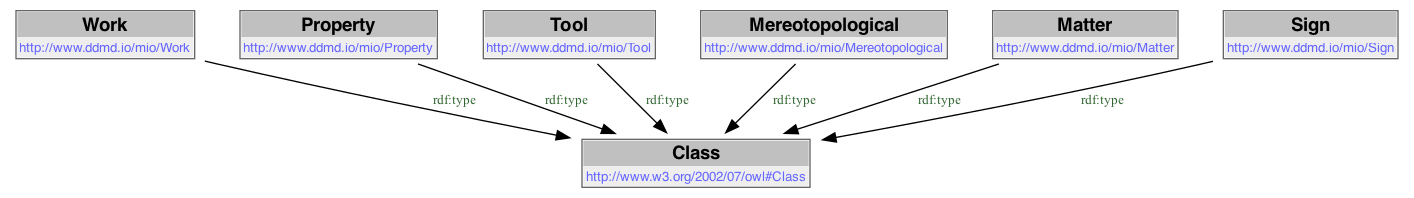

In [14]:
ontovis_sub1=OntoVis(g_sub1)
vis(g_sub1, max_string_length=5)


In [17]:
ontovis_g=OntoVis(g) 
g_sub2=ontovis_g.zoom_in_classes("http://www.ddmd.io/mio/Matter", (1,4))

(rdflib.term.URIRef('http://www.ddmd.io/mio/Environment'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Medium'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Test_Environment'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Material'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Composite_Material'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Specimen'),)


In [18]:
len(g_sub2)

7

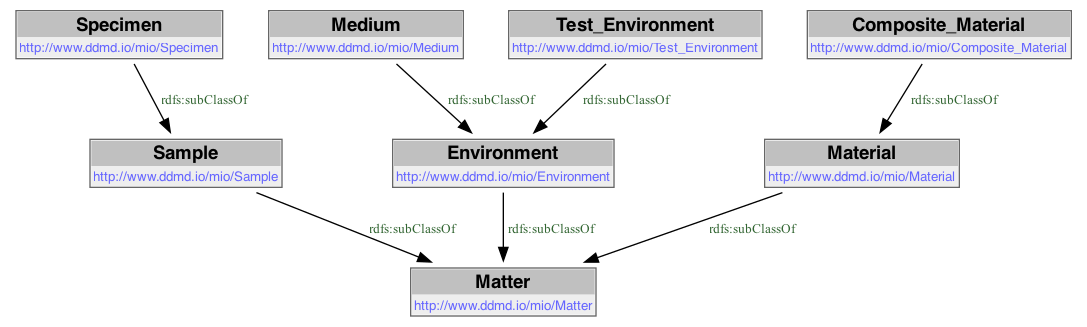

In [19]:
vis(g_sub2)

In [20]:
g_sub3=ontovis_g.zoom_in_classes(mio.Matter, (2,3))

(rdflib.term.URIRef('http://www.ddmd.io/mio/Environment'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Medium'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Test_Environment'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Material'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Composite_Material'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'),)
(rdflib.term.URIRef('http://www.ddmd.io/mio/Specimen'),)


In [21]:
print(g_sub3.serialize())

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

<http://www.ddmd.io/mio/Composite_Material> rdfs:subClassOf <http://www.ddmd.io/mio/Material> .

<http://www.ddmd.io/mio/Medium> rdfs:subClassOf <http://www.ddmd.io/mio/Environment> .

<http://www.ddmd.io/mio/Specimen> rdfs:subClassOf <http://www.ddmd.io/mio/Sample> .

<http://www.ddmd.io/mio/Test_Environment> rdfs:subClassOf <http://www.ddmd.io/mio/Environment> .

<http://www.ddmd.io/mio/Material> rdfs:subClassOf <http://www.ddmd.io/mio/Matter> .

<http://www.ddmd.io/mio/Sample> rdfs:subClassOf <http://www.ddmd.io/mio/Matter> .

<http://www.ddmd.io/mio/Environment> rdfs:subClassOf <http://www.ddmd.io/mio/Matter> .




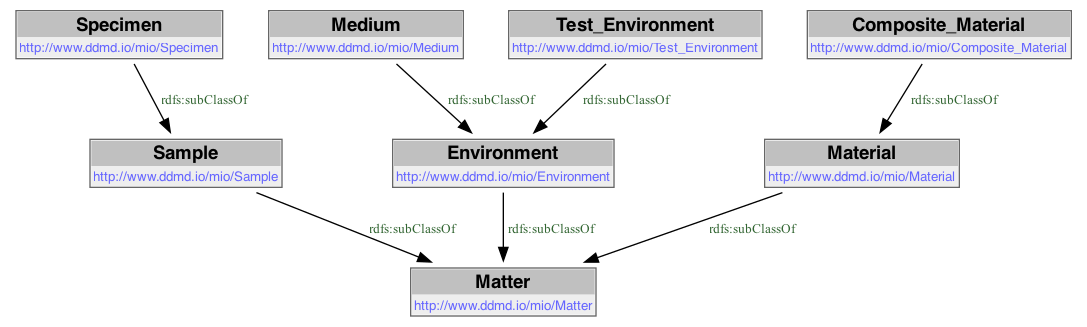

In [22]:
vis(g_sub3, max_string_length=5)

In [23]:
uri=mio.Data_Visualization
#uri=mio.Data_Analysis
uri=mio.Sample
# This is blind to BNode.
query = """
        SELECT ?s ?p ?o
        WHERE {
            {BIND (<%s> as ?s)
            { ?s ?p ?o  }} UNION
            {BIND (<%s> as ?o)
            { ?s ?p ?o  }} 
        }
        """ % (uri,uri)

In [24]:
q=g.query(query)

In [25]:
for i in q:
    print (i) 

(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://www.ddmd.io/mio/Matter'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.BNode('n22c1e4d5c90f4221915faf4425480032b2'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('Represents a portion of a material or composite material taken for testing or analysis.'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Sample'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Sample'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Specimen'), rdflib.term.UR

In [26]:
uri=mio.Data_Visualization

query = """
        SELECT ?s ?p ?o
        WHERE {
            {BIND (<%s> as ?s)
            { ?s ?p ?o  }} UNION
            {BIND (<%s> as ?o)
            { ?s ?p ?o  }} 
        }
        """ % (uri,uri)

In [27]:
q=g.query(query)
for i in q:
    print (i) 

(rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Visualization'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Visualization'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Analysis'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Visualization'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://www.ddmd.io/mio/Displayed_Data'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Visualization'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('Represents the graphical representation of the data collected during the mechanical testing of composites.'))
(rdflib.term.URIRef('http://www.ddmd.io/mio/Data_Visualization'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.

In [28]:
def print_bnode_details(graph, bnode):
    recurse_bnode(graph, bnode)

def recurse_bnode(g, node, depth=0):
    indent = "     " * depth
    for s, p, o in g.triples((node, None, None)):
        print(f"{indent}{s} \t {p} \t {o}")
        if isinstance(o, BNode) and o != node:
            recurse_bnode(g, o, depth + 1)
    for s, p, o in g.triples((None, None, node)):
        if s != node:
            print(f"{indent}{s} \t {p} \t {o}")
            if isinstance(s, BNode):
                recurse_bnode(g, s, depth + 1)



In [29]:
# Suppose 'some_bnode' is the BNode you've encountered
# Note: every load, we need to update the string, it changes! 
some_bnode = BNode('na19da294384b489b913d918890bcf7ecb1')  # Replace "someUID" with the actual UID of the BNode
print_bnode_details(g, some_bnode)


In [30]:
def is_bnode(node):
    if isinstance(node, BNode):
        return str(node)  # Return the UUID of the BNode
    return None  # Return None if it's not a BNode


for s,p,o in g: 
    if (bnode_uuid := is_bnode(s)):
        print("\n")
        print_bnode_details(g, s)
        print("\n")
        # Do something with the BNode
    





n22c1e4d5c90f4221915faf4425480032b2 	 http://www.w3.org/1999/02/22-rdf-syntax-ns#type 	 http://www.w3.org/2002/07/owl#Restriction
n22c1e4d5c90f4221915faf4425480032b2 	 http://www.w3.org/2002/07/owl#onProperty 	 http://www.ddmd.io/mio/hasPart
n22c1e4d5c90f4221915faf4425480032b2 	 http://www.w3.org/2002/07/owl#someValuesFrom 	 http://www.ddmd.io/mio/Material
http://www.ddmd.io/mio/Sample 	 http://www.w3.org/2000/01/rdf-schema#subClassOf 	 n22c1e4d5c90f4221915faf4425480032b2




n22c1e4d5c90f4221915faf4425480032b1 	 http://www.w3.org/1999/02/22-rdf-syntax-ns#type 	 http://www.w3.org/2002/07/owl#Restriction
n22c1e4d5c90f4221915faf4425480032b1 	 http://www.w3.org/2002/07/owl#onProperty 	 http://www.ddmd.io/mio/hasPart
n22c1e4d5c90f4221915faf4425480032b1 	 http://www.w3.org/2002/07/owl#someValuesFrom 	 http://www.ddmd.io/mio/Process_Step
http://www.ddmd.io/mio/Material_Manufacturing 	 http://www.w3.org/2000/01/rdf-schema#subClassOf 	 n22c1e4d5c90f4221915faf4425480032b1




n22c1e4d5c90f422

In [31]:
g5=ontovis_g.zoom_in(mio.Material_Manufacturing, 2)
#g5=ontovis.zoom_in(mio.Data_Analysis, 2)
#ontodot.vis(g5, max_string_length=5)



hello: n22c1e4d5c90f4221915faf4425480032b1


In [32]:
g6=ontovis_g.zoom_in(BNode('na19da294384b489b913d918890bcf7ecb1'), 1)
print(g6.serialize())


hello: na19da294384b489b913d918890bcf7ecb1




In [33]:
g7=g6+g5

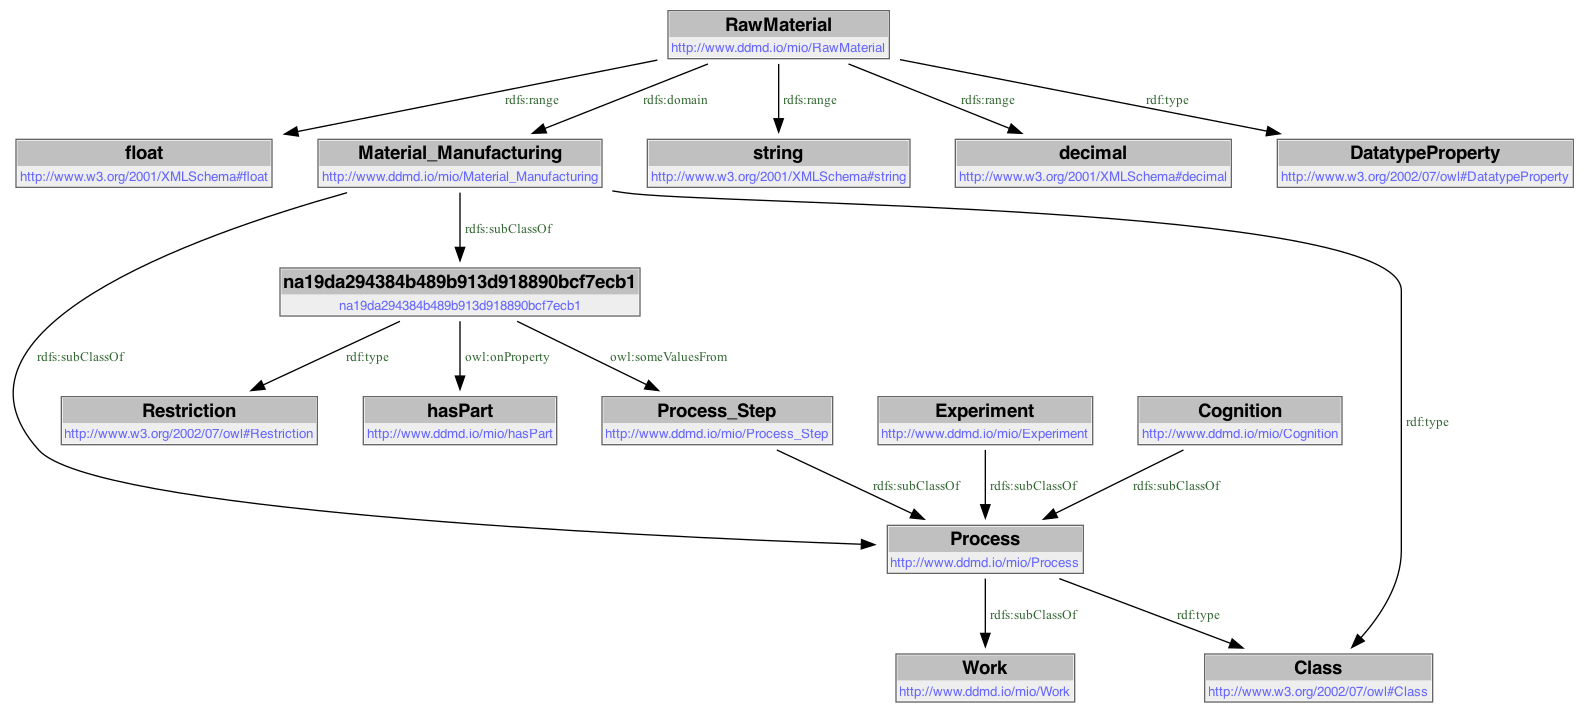

In [54]:
vis(g7, max_string_length=5)

In [44]:
query = """
    SELECT ?s ?p ?o
    WHERE {
        {BIND (<%s> as ?s)
        { ?s ?p ?o  }} UNION
        {BIND (<%s> as ?o)
        { ?s ?p ?o  }} 
    }
""" % (BNode("n6a6f193c7c4e49bcba12ebe1edb6f902b1"), BNode("n6a6f193c7c4e49bcba12ebe1edb6f902b1"))

In [45]:
for s, p, o in g.query(query):
    print (s, p, o)

In [55]:
ontovis_g.explode_bnode(g, BNode("na19da294384b489b913d918890bcf7ecb1"))

	*depth na19da294384b489b913d918890bcf7ecb1 	 http://www.w3.org/1999/02/22-rdf-syntax-ns#type 	 http://www.w3.org/2002/07/owl#Restriction
	*depth na19da294384b489b913d918890bcf7ecb1 	 http://www.w3.org/2002/07/owl#onProperty 	 http://www.ddmd.io/mio/hasPart
	*depth na19da294384b489b913d918890bcf7ecb1 	 http://www.w3.org/2002/07/owl#someValuesFrom 	 http://www.ddmd.io/mio/Process_Step
